# NeuFit Modeling Pipeline

#### Assumptions

- This Jupyter notebook runs best in Kernel: **neufit**

##### File Locations

In [1]:
#Datasets: keynameDatatypeCollob
#hutchKraken
hutchKrakenAlex_biom = '/home/cguccion/rawData/01_11_2021_Hutch340_BE_Samples_LudmilAlexandrov/biom' #location of biom files from kraken->biom pipeline
##70 in neutral_fit.py

#TCGA_WGS
tcgaEhnWGSgreg_ = '/home/cguccion/rawData/April2021_Greg_TCGA_WGS/raw_from_Greg'#Location of raw data
##82 in neutral_fit.py AND ##111 in utils.py

##Two metadata options here: #1 from Greg orginally, #2 With TCGA Incorperated
#tcgaEhnWGSgreg_meta = str(tcgaEhnWGSgreg_ + '/' + '13722_20210405-101126-TCGA-WGS-Qiita-sample-metadata.txt') #Greg OG
#tcgaEhnWGSgreg_meta = str('/home/cguccion/rawData/April2021_Greg_TCGA_WGS/meta_expansion/13722_20210405-101126-TCGA-WGS-Qiita-sample-metadata_esoph_hnc_metaExpand.txt') #TCGA
tcgaEhnWGSgreg_meta = str('/home/cguccion/rawData/April2021_Greg_TCGA_WGS/meta_expansion/13722_20210405-101126-TCGA-WGS-Qiita-sample-metadata_esoph_hnc_MetaExpand.txt') #TCGA

tcgaEhnWGSgreg_taxa = str(tcgaEhnWGSgreg_ + '/' + 'wol_gotu_taxonomy.csv')

#Intermediate Files
neufit_input_path = '/home/cguccion/NeutralEvolutionModeling/ipynb/data_tax_csv' #location of _data.csv and _tax.csv files for Neufit input
##40 & 167 in utils.py

#Output Files
neufit_output_path = '/home/cguccion/NeutralEvolutionModeling/ipynb/neufit_output' #location of all graphs and command line outputs from running Neufit
##257 in neutral_fit.py


##### Import Functions

In [1]:
from nevo.neutral_fit import neufit, nevo_pipeline
from nevo.utils import biom2data_tax

import matplotlib
%matplotlib inline

## Choose Dataset + Run Pipeline

### Hutch Kraken Dataset: Ludmil Alexandrov

##### Dataset Info

#### Combined Data (Everything in the dataset)

/home/cguccion/NeutralEvolutionModeling/nevo/utils.py:59: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  'Family', 'Genus', 'Species'], axis=1)


Running dataset: hutchKrakenCategory:combined

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 5684
    # variables        = 1
    chi-square         = 15.4296370
    reduced chi-square = 0.00271505
    Akaike info crit   = -33585.4401
    Bayesian info crit = -33578.7946
[[Variables]]
    N:  2108 (fixed)
    m:  0.32063675 +/- 0.00842887 (2.63%) (init = 0.5)

 R^2 = 0.81

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
2,0.962330,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6A
1,0.936140,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6B
3,0.744102,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
4,0.641168,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus
0,0.605902,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__sp. J380


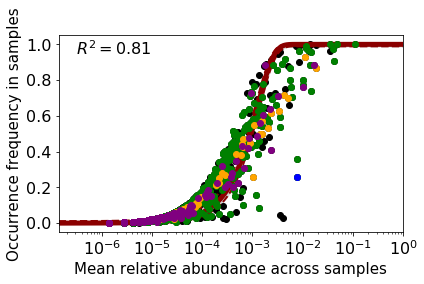

In [5]:
#Run with no output files
nevo_pipeline('combined', 'hutchKraken', 'combined_biome', non_save = True)

#Run with all output files
#nevo_pipeline('combined', 'hutchKraken', 'combined_biome', non_save = False)

#### Progressors Data (Patients who went onto progressor to EAC)

/home/cguccion/NeutralEvolutionModeling/nevo/utils.py:59: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  'Family', 'Genus', 'Species'], axis=1)


Running dataset: hutchKrakenCategory:progressors

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 4907
    # variables        = 1
    chi-square         = 17.2342448
    reduced chi-square = 0.00351289
    Akaike info crit   = -27730.0069
    Bayesian info crit = -27723.5085
[[Variables]]
    N:  2108 (fixed)
    m:  0.26556126 +/- 0.00755294 (2.84%) (init = 0.5)

 R^2 = 0.78

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
5,0.974973,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6A
2,0.819568,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__sp. J380
3,0.787383,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
1,0.734013,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Comamonadaceae,g__Comamonas,s__thiooxydans
4,0.649955,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus
0,0.597847,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__vestibularis


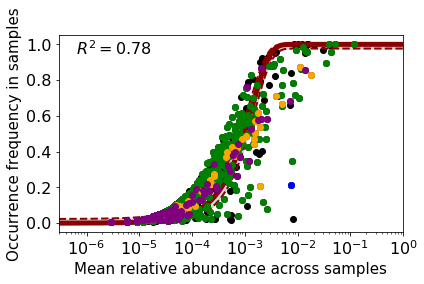

In [6]:
#Run with no output files
nevo_pipeline('progressors', 'hutchKraken', 'P_biome', non_save = True)

#### Progressor Data Time Point 1 Only (Patients who went onto progressor to EAC, but were healthy at this timepoint (timepoint 1))

/home/cguccion/NeutralEvolutionModeling/nevo/utils.py:59: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  'Family', 'Genus', 'Species'], axis=1)


Running dataset: hutchKrakenCategory:progressorsT1

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 11
    # data points      = 4021
    # variables        = 1
    chi-square         = 18.1083813
    reduced chi-square = 0.00450457
    Akaike info crit   = -21723.1052
    Bayesian info crit = -21716.8059
[[Variables]]
    N:  2108 (fixed)
    m:  0.27621648 +/- 0.00916667 (3.32%) (init = 0.5)

 R^2 = 0.75

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
6,0.974459,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6A
7,0.787500,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
5,0.768365,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__oleovorans
3,0.718885,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Faecalibacterium,s__prausnitzii
4,0.634971,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__sp. phDV1
1,0.617537,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,g__Paracoccus,s__yeei
0,0.577596,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__amylovorus
2,0.511888,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus


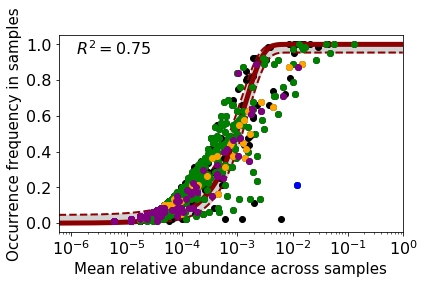

In [7]:
#Run with no output files
nevo_pipeline('progressorsT1', 'hutchKraken', 'P_T1_biome', non_save = True)

#### Progressor Data Time Point 2 Only (Patients who went onto progressor to EAC, and had cancer at this timepoint (timepoint 2))

/home/cguccion/NeutralEvolutionModeling/nevo/utils.py:59: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  'Family', 'Genus', 'Species'], axis=1)


Running dataset: hutchKrakenCategory:progressorsT2

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 3959
    # variables        = 1
    chi-square         = 18.4466397
    reduced chi-square = 0.00466060
    Akaike info crit   = -21253.3347
    Bayesian info crit = -21247.0509
[[Variables]]
    N:  2127 (fixed)
    m:  0.27301280 +/- 0.00898613 (3.29%) (init = 0.5)

 R^2 = 0.75

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
7,0.975000,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6A
6,0.896814,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__sp. J380
5,0.840977,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Comamonadaceae,g__Comamonas,s__thiooxydans
3,0.775732,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__vestibularis
4,0.726625,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
1,0.604601,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__sp. MYb193
8,0.575000,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus
2,0.532402,k__Bacteria,p__Firmicutes,c__Negativicutes,o__Selenomonadales,f__Selenomonadaceae,g__Selenomonas,s__sputigena
0,0.502915,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Bifidobacteriales,f__Bifidobacteriaceae,g__Bifidobacterium,s__animalis


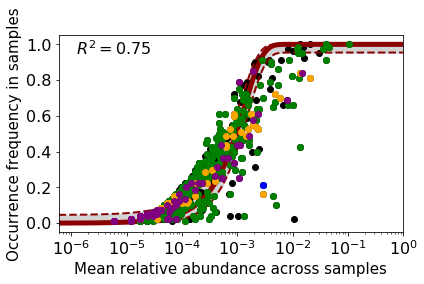

In [8]:
#Run with no output files
nevo_pipeline('progressorsT2', 'hutchKraken', 'P_T2_biome', non_save = True)

#### NonProgressor Data  (Patients who went never progressed to EAC

/home/cguccion/NeutralEvolutionModeling/nevo/utils.py:59: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  'Family', 'Genus', 'Species'], axis=1)


Running dataset: hutchKrakenCategory:nonProgressors

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 4933
    # variables        = 1
    chi-square         = 14.1519321
    reduced chi-square = 0.00286941
    Akaike info crit   = -28875.0492
    Bayesian info crit = -28868.5455
[[Variables]]
    N:  2251 (fixed)
    m:  0.40348780 +/- 0.01140729 (2.83%) (init = 0.5)

 R^2 = 0.84

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
1,0.955543,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6B
2,0.722222,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
3,0.622222,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus
0,0.547860,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Tannerellaceae,g__Tannerella,s__sp. oral taxon HOT-286


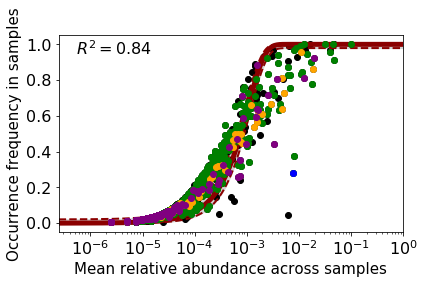

In [9]:
#Run with no output files
nevo_pipeline('nonProgressors', 'hutchKraken', 'NP_biome', non_save = True)

#### NonProgressor Data Time Point 1 Only (Patients who did not progress to EAC ever (timepoint 1)

/home/cguccion/NeutralEvolutionModeling/nevo/utils.py:59: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  'Family', 'Genus', 'Species'], axis=1)


Running dataset: hutchKrakenCategory:nonProgressorsT1

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 4016
    # variables        = 1
    chi-square         = 14.9598798
    reduced chi-square = 0.00372600
    Akaike info crit   = -22458.1616
    Bayesian info crit = -22451.8636
[[Variables]]
    N:  2401 (fixed)
    m:  0.44999867 +/- 0.01484265 (3.30%) (init = 0.5)

 R^2 = 0.83

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
1,0.950000,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6B
2,0.737500,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
0,0.587499,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus


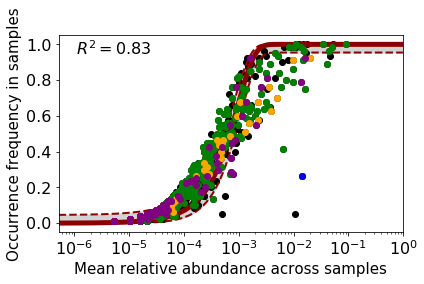

In [10]:
#Run with no output files
nevo_pipeline('nonProgressorsT1', 'hutchKraken', 'NP_T1_biome', non_save = True)

#### NonProgressor Data Time Point 2 Only (Patients who did not progress to EAC ever, now at thier second check (timepoint 2)

/home/cguccion/NeutralEvolutionModeling/nevo/utils.py:59: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  'Family', 'Genus', 'Species'], axis=1)


Running dataset: hutchKrakenCategory:nonProgressorsT2

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 3907
    # variables        = 1
    chi-square         = 15.5598302
    reduced chi-square = 0.00398357
    Akaike info crit   = -21587.4275
    Bayesian info crit = -21581.1570
[[Variables]]
    N:  2251 (fixed)
    m:  0.33594691 +/- 0.01051305 (3.13%) (init = 0.5)

 R^2 = 0.82

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
1,0.926768,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6B
0,0.693544,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
3,0.662499,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus
2,0.560871,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Tannerellaceae,g__Tannerella,s__sp. oral taxon HOT-286


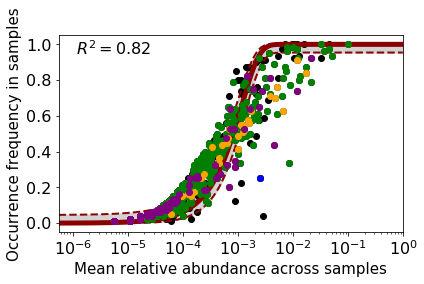

In [11]:
#Run with no output files
nevo_pipeline('nonProgressorsT2', 'hutchKraken', 'NP_T2_biome', non_save = True)

### TCGA WGS Esophagus / Head and Neck Cancer Dataset: Greg Poore

#### Esophagus Normal (Paired Tissue Normal)

Running dataset: TCGA_WGSCategory:esophagus_normal

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 722
    # variables        = 1
    chi-square         = 11.2209339
    reduced chi-square = 0.01556302
    Akaike info crit   = -3004.58417
    Bayesian info crit = -3000.00214
[[Variables]]
    N:  3195 (fixed)
    m:  0.01236918 +/- 0.00102603 (8.30%) (init = 0.5)

 R^2 = 0.02

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
7,0.817117,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Bradyrhizobiaceae,g__Bradyrhizobium,s__Bradyrhizobium elkanii
6,0.773358,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
4,0.772288,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
5,0.731279,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
8,0.655951,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
2,0.648076,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Alcaligenaceae,g__Orrella,s__Orrella dioscoreae
1,0.572817,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,f__Oceanospirillaceae,g__Oceanospirillum,s__Oceanospirillum linum
3,0.526674,k__Bacteria,p__Firmicutes,c__Erysipelotrichia,o__Erysipelotrichales,f__Erysipelotrichaceae,g__Faecalitalea,s__Faecalitalea cylindroides
0,0.504686,k__Bacteria,p__Planctomycetes,c__Planctomycetia,o__Planctomycetales,f__Planctomycetaceae,g__Planctopirus,s__Planctopirus sp. JC280


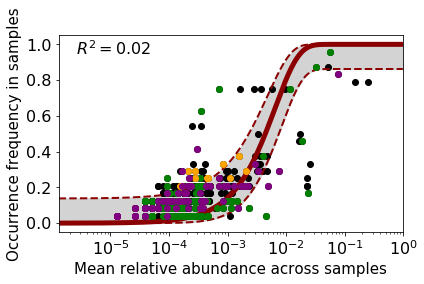

In [2]:
#Run with no output files
nevo_pipeline('normal', 'TCGA_WGS', 'e', non_save = True)

#### Esophgous Cancer: Squamous Cell Carcinoma

Running dataset: TCGA_WGSCategory:esophagus_squamousCellCarcinoma_cancer

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 35
    # data points      = 1350
    # variables        = 1
    chi-square         = 11.8706802
    reduced chi-square = 0.00879961
    Akaike info crit   = -6388.61429
    Bayesian info crit = -6383.40643
[[Variables]]
    N:  3587 (fixed)
    m:  0.01125022 +/- 6.2116e-04 (5.52%) (init = 0.5)

 R^2 = 0.29

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
8,0.790817,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Bradyrhizobiaceae,g__Bradyrhizobium,s__Bradyrhizobium elkanii
6,0.699361,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
5,0.698689,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
4,0.698643,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
7,0.686201,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
1,0.533825,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Alcaligenaceae,g__Orrella,s__Orrella dioscoreae
0,0.525895,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__,g__Rhizobacter,s__Rhizobacter sp. Root404
2,0.513820,k__Bacteria,p__Firmicutes,c__Erysipelotrichia,o__Erysipelotrichales,f__Erysipelotrichaceae,g__Faecalitalea,s__Faecalitalea cylindroides
3,0.507196,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__,g__Ideonella,s__Ideonella sakaiensis


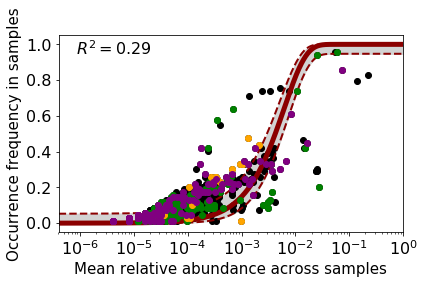

In [3]:
#Run with no output files
nevo_pipeline('cancer', 'TCGA_WGS', 'e_scc', non_save = True)

#### Head and Neck Normal (Paired Tissue Normal)

Running dataset: TCGA_WGSCategory:headNeck_normal

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 2718
    # variables        = 1
    chi-square         = 65.0164395
    reduced chi-square = 0.02392950
    Akaike info crit   = -10144.3251
    Bayesian info crit = -10138.4174
[[Variables]]
    N:  57320 (fixed)
    m:  0.02569027 +/- 0.00113710 (4.43%) (init = 0.5)

 R^2 = 0.35

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
29,0.958333,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Micrococcales,f__Intrasporangiaceae,g__Phycicoccus,s__Phycicoccus sp. Root563
13,0.833762,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Campylobacteraceae,g__Campylobacter,s__Campylobacter hominis
22,0.831664,k__Bacteria,p__Actinobacteria,c__Coriobacteriia,o__Coriobacteriales,f__Atopobiaceae,g__Olsenella,s__Olsenella sp. oral taxon 809
36,0.791667,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingomonas,s__Sphingomonas taxi
23,0.790430,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingomonas,s__Sphingomonas paucimobilis
21,0.783875,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Campylobacteraceae,g__Campylobacter,s__Campylobacter ureolyticus
7,0.732324,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Corynebacteriales,f__Corynebacteriaceae,g__Corynebacterium,s__Corynebacterium argentoratense
11,0.693219,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingomonas,s__Sphingomonas echinoides
10,0.680492,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingobium,s__Sphingobium sp. C100
35,0.666667,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Candidatus Bacteroides periocalifornicus


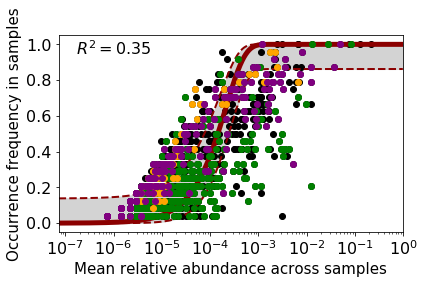

In [4]:
#Run with no output files
nevo_pipeline('normal', 'TCGA_WGS', 'hn', non_save = True)

#### Head and Neck Cancer

Running dataset: TCGA_WGSCategory:headNeck_cancer

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 1776
    # variables        = 1
    chi-square         = 11.4750943
    reduced chi-square = 0.00646484
    Akaike info crit   = -8952.48536
    Bayesian info crit = -8947.00324
[[Variables]]
    N:  3530 (fixed)
    m:  0.02020091 +/- 8.0495e-04 (3.98%) (init = 0.5)

 R^2 = 0.58

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
2,0.803530,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingomonas,s__Sphingomonas taxi
4,0.722060,k__Bacteria,p__Spirochaetes,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Treponema,s__Treponema denticola
0,0.576718,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Porphyromonadaceae,g__Sanguibacteroides,s__Sanguibacteroides justesenii
3,0.562325,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,o__Flavobacteriales,f__Flavobacteriaceae,g__Capnocytophaga,s__Capnocytophaga sputigena
1,0.504718,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Candidatus Bacteroides periocalifornicus


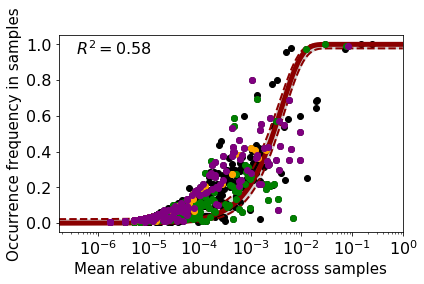

In [5]:
#Run with no output files
nevo_pipeline('cancer', 'TCGA_WGS', 'hn', non_save = True)